In [41]:
import csv
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
with open('MachineLearningRating_v3.txt', 'r') as file:
    reader = csv.reader(file, delimiter='1')  # Replace ' ' with your actual delimiter 
    for i, row in enumerate(reader):
        if i < 5:  # Print only the first five rows
            print(row)

['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims']
['', '45249|', '2827|20', '5-03-0', ' 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|', '459|Rand East|Rand East|Mobility - Motor|44069', '50|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|', '30|S/D|4|6/2002|', '', '9300|Yes|No|', '', '9300|More than 6 months||||

KeyboardInterrupt: 

In [17]:
with open('MachineLearningRating_v3.txt', 'r') as file:
    reader = csv.reader(file, delimiter=' ')  # Replace ' ' with your actual delimiter
    row_count = 0  # Keep track of the number of rows printed
    for row in reader:
        try:
            # Access the 52nd column (index 51)
            column_52_value = row[51]
            print(column_52_value)
            row_count += 1  
            if row_count >= 5:  
                break
        except IndexError:
            print("Skipping row with insufficient columns.")

Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.
Skipping row with insufficient columns.


In [7]:
def separate_columns(filename, output_filename):
    data = []
    with open(filename, 'r') as infile, open(output_filename, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        for line in infile:
            columns = line.strip().split('|')
            writer.writerow(columns)


In [42]:
filename = 'MachineLearningRating_v3.txt'  # Replace with your file name
output_filename = 'MachineLearningRating_v3.csv'  # Replace with desired output file name

separate_columns(filename, output_filename)

print(f"Data separated and saved to '{output_filename}'.")


Data separated and saved to 'MachineLearningRating_v3.csv'.


In [40]:
def calculate_variability(data_column):
    """Calculates variability measures for a numerical column."""
    range_value = max(data_column) - min(data_column)
    variance = statistics.variance(data_column)
    std_dev = statistics.stdev(data_column)
    q1 = statistics.quantiles(data_column)[0]
    q3 = statistics.quantiles(data_column)[2]
    iqr = q3 - q1
    return range_value, variance, std_dev, iqr

def analyze_csv(filename, column_names):
    total_premium = []
    total_claim = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)  # Use DictReader for easier column access
        for row in reader:
            for column_name in column_names:
                if column_name == 'TotalPremium':
                    total_premium.append(float(row[column_name]))
                elif column_name == 'TotalClaims':
                    total_claim.append(float(row[column_name]))
    print("TotalPremium:")
    range_tp, variance_tp, std_dev_tp, iqr_tp = calculate_variability(total_premium)
    print("Range:", range_tp)
    print("Variance:", variance_tp)
    print("Standard Deviation:", std_dev_tp)
    print("IQR:", iqr_tp)

    print("\nTotalClaims:")
    range_tc, variance_tc, std_dev_tc, iqr_tc = calculate_variability(total_claim)
    print("Range:", range_tc)
    print("Variance:", variance_tc)
    print("Standard Deviation:", std_dev_tc)
    print("IQR:", iqr_tc)

# Example usage
filename = 'MachineLearningRating_v3.csv'  # Replace with your CSV file name
column_names = ['TotalPremium', 'TotalClaims']  # Replace with your actual column names

analyze_csv(filename, column_names)

FileNotFoundError: [Errno 2] No such file or directory: 'MachineLearningRating_v3.csv'

In [39]:
def review_data_structure(filename):
    df = pd.read_csv(filename)
    print(df.info())

# Example usage
filename = 'MachineLearningRating_v3.csv'  # Replace with your CSV file name

review_data_structure(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'MachineLearningRating_v3.csv'

In [14]:
def check_missing_values(filename):
    df = pd.read_csv(filename)
    print(df.isnull().sum())  # Print the count of missing values in each column

# Example usage
filename = 'MachineLearningRating_v3.csv'  # Replace with your CSV file name

check_missing_values(filename)

C:\Users\khan\AppData\Local\Temp\ipykernel_4944\1197889453.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

C:\Users\khan\AppData\Local\Temp\ipykernel_4944\2113624588.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\khan\AppData\Local\Temp\ipykernel_4944\2113624588.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)


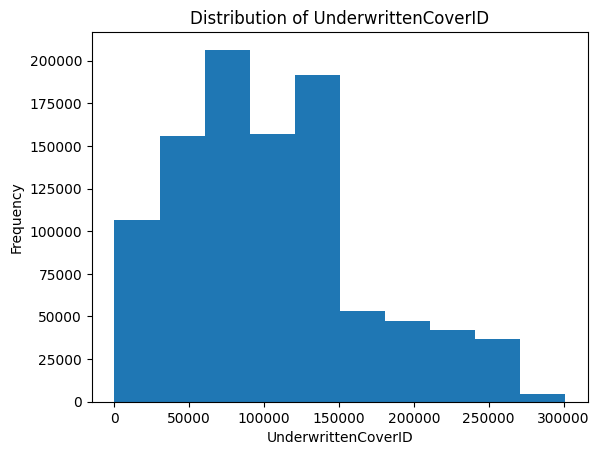

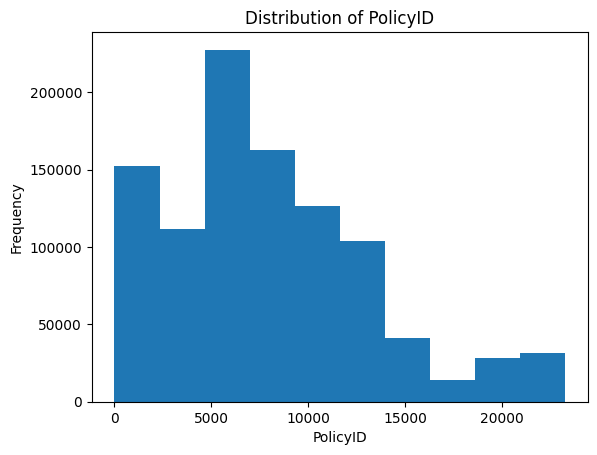

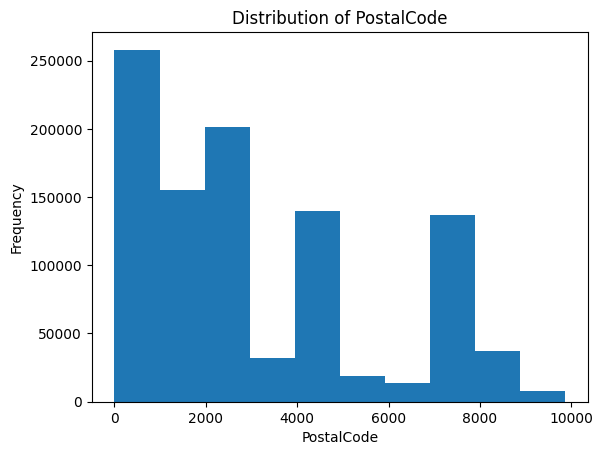

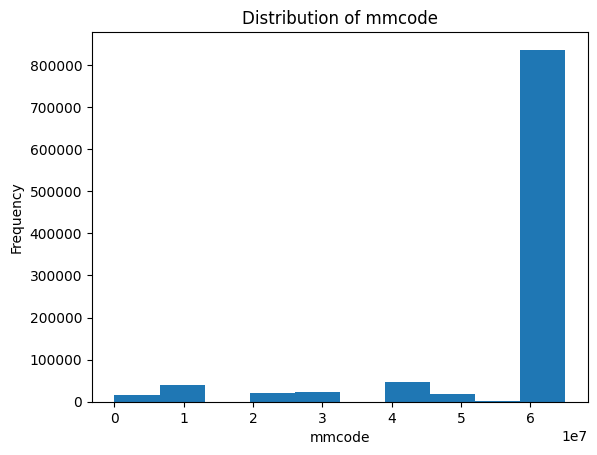

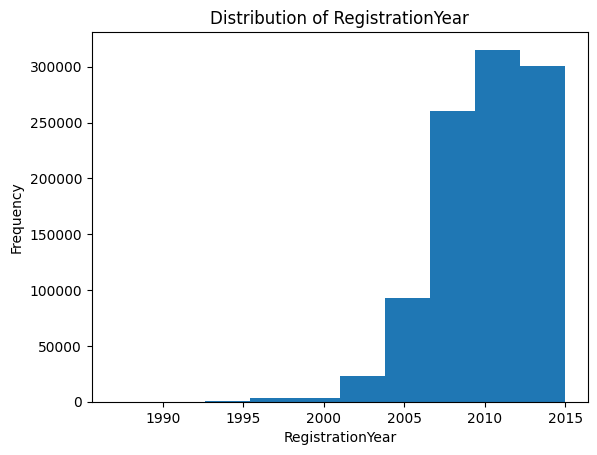

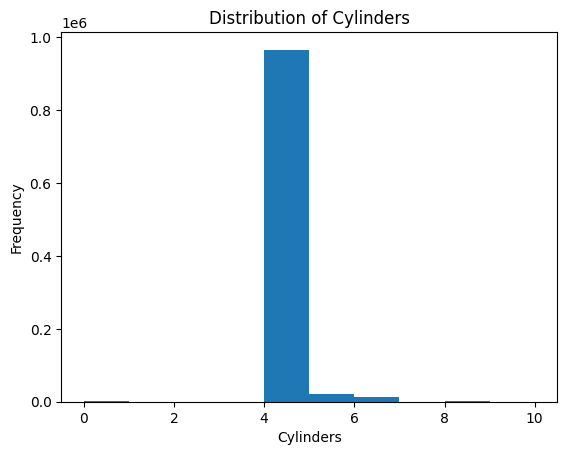

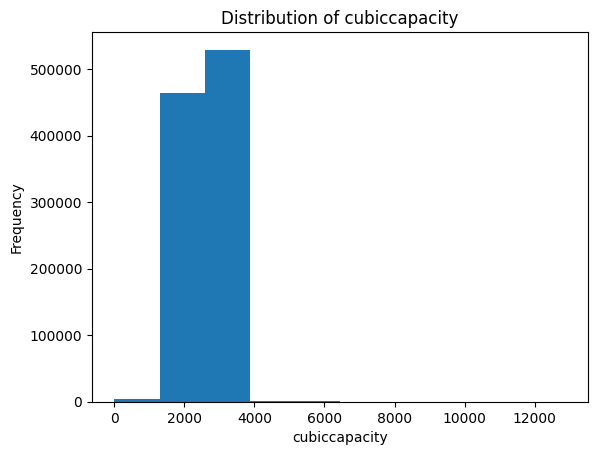

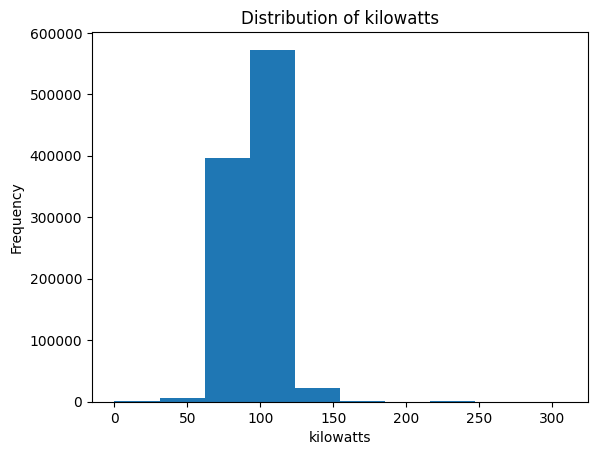

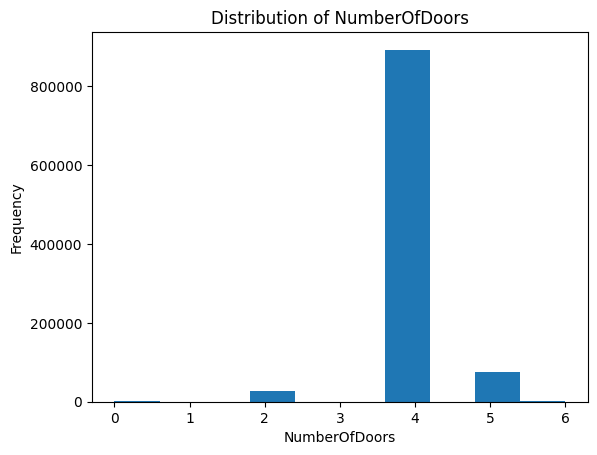

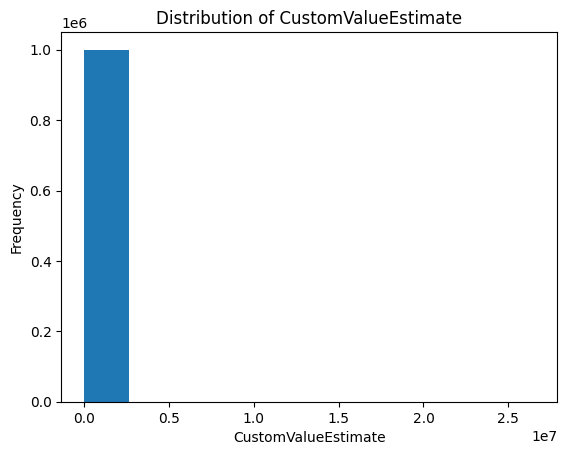

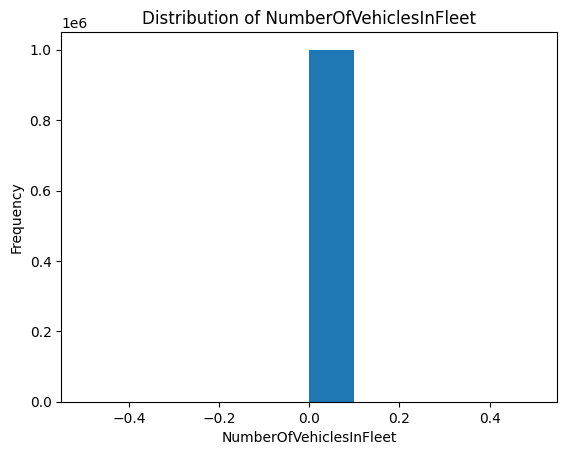

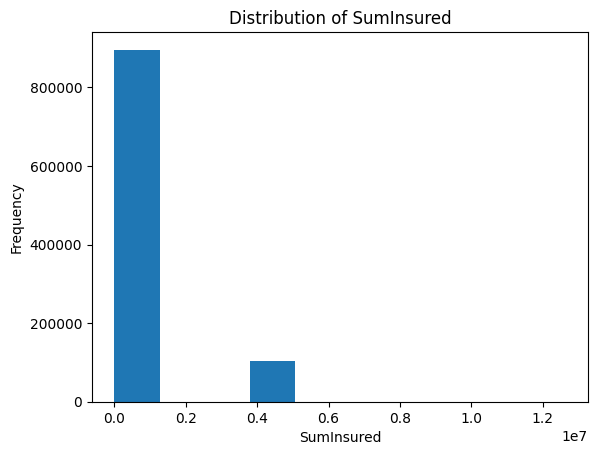

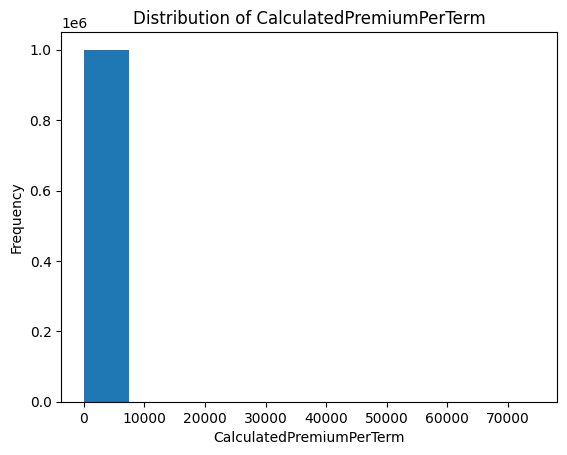

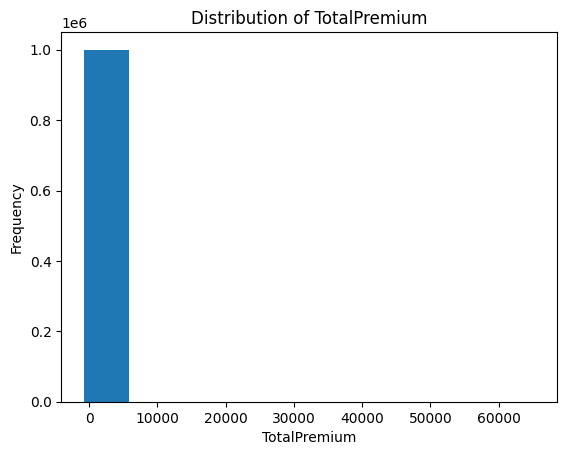

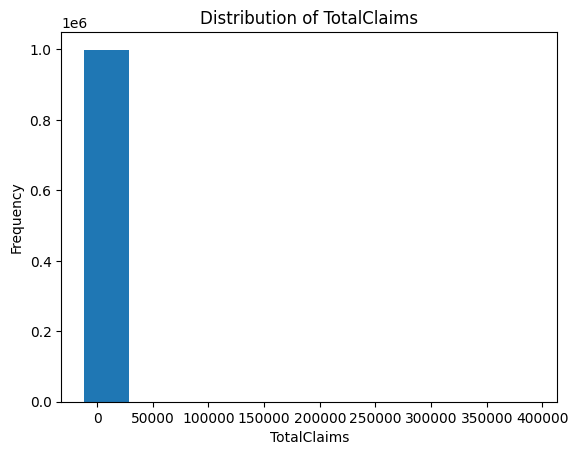

In [23]:
def plot_distributions(filename):
    df = pd.read_csv(filename)

        # Fill NaN values with 0 in all numerical columns
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]) and df[column].dtype != 'bool':
            df[column].fillna(0, inplace=True)

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]) and df[column].dtype != 'bool':
            # Plot histogram for numerical columns (excluding booleans)
            plt.figure()
            plt.hist(df[column], bins=10)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()


filename = 'MachineLearningRating_v3.csv'  # Replace with your CSV file name

plot_distributions(filename)

C:\Users\khan\AppData\Local\Temp\ipykernel_4944\1422799526.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


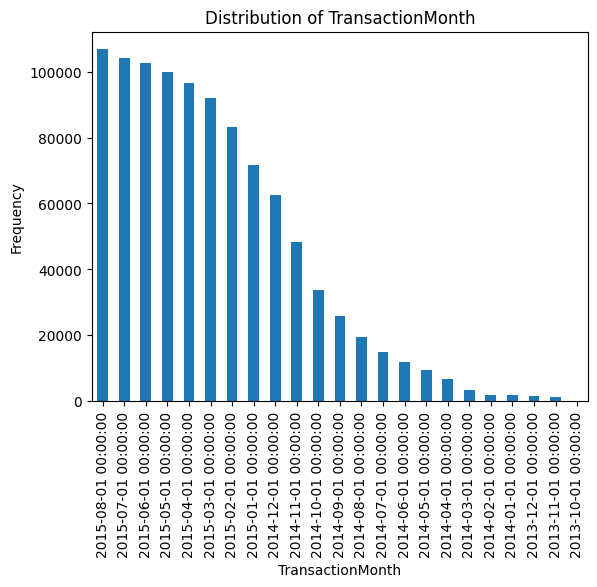

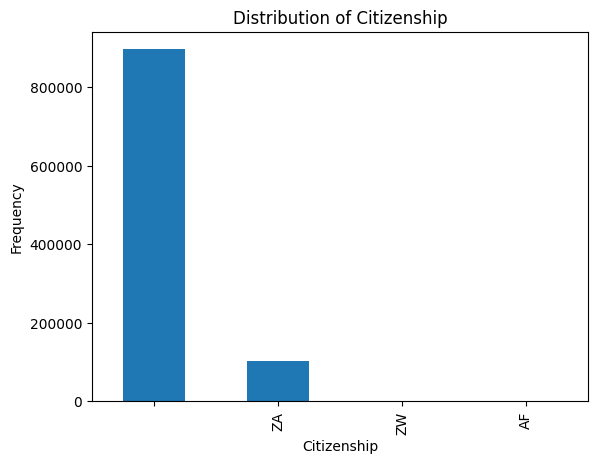

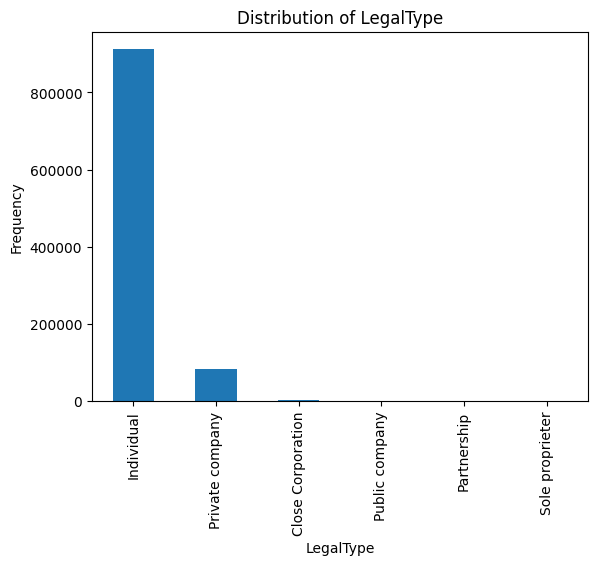

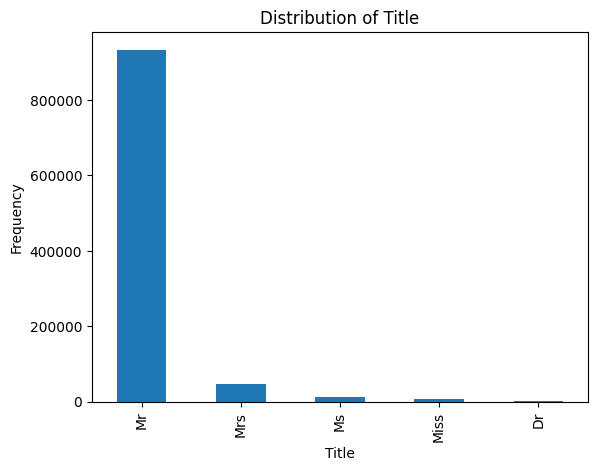

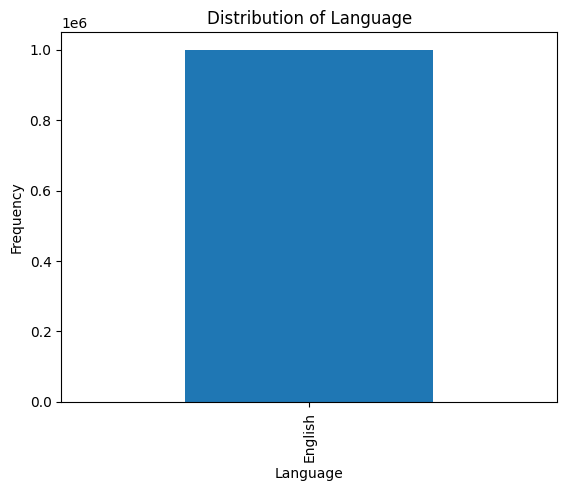

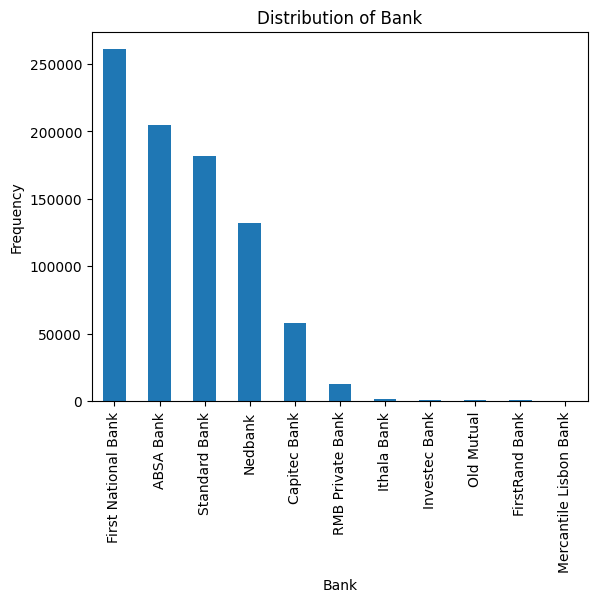

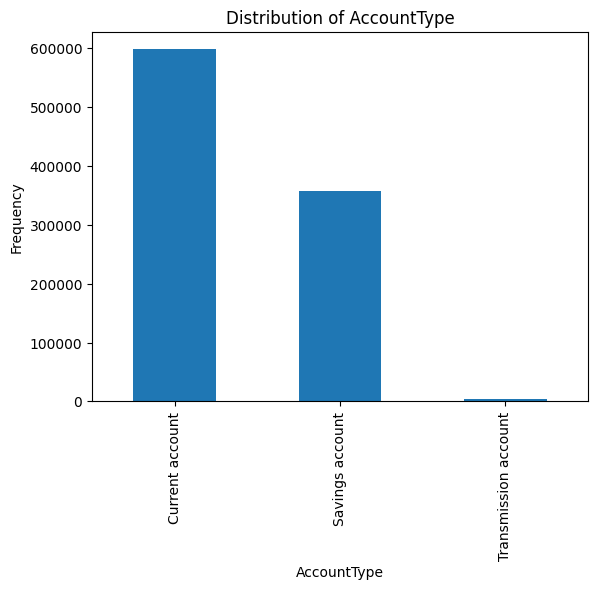

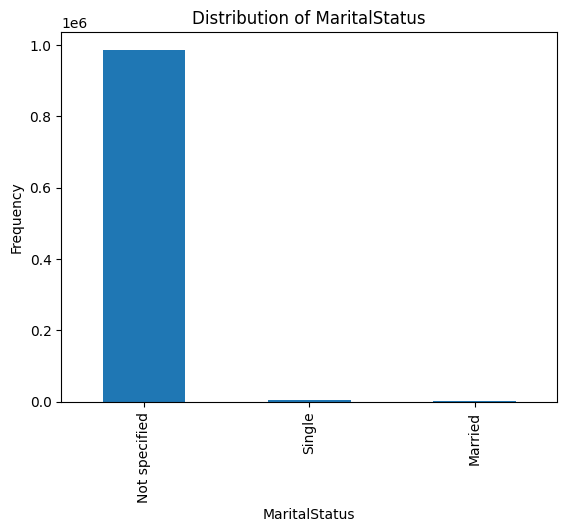

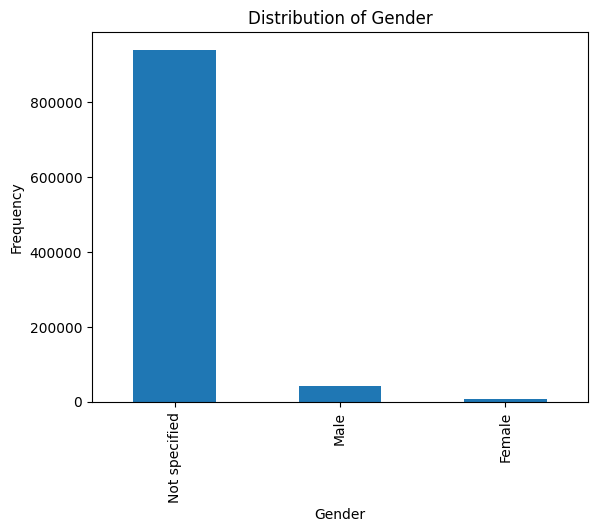

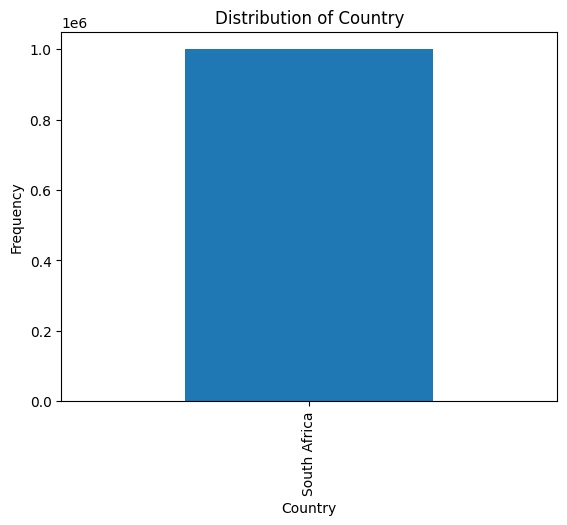

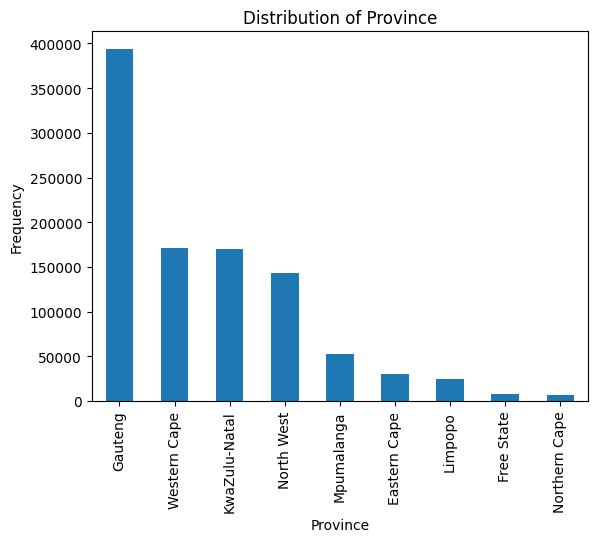

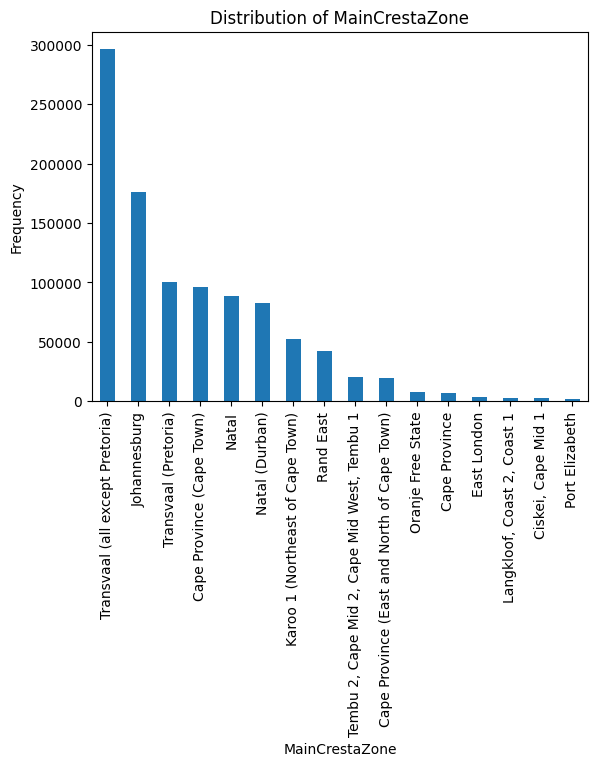

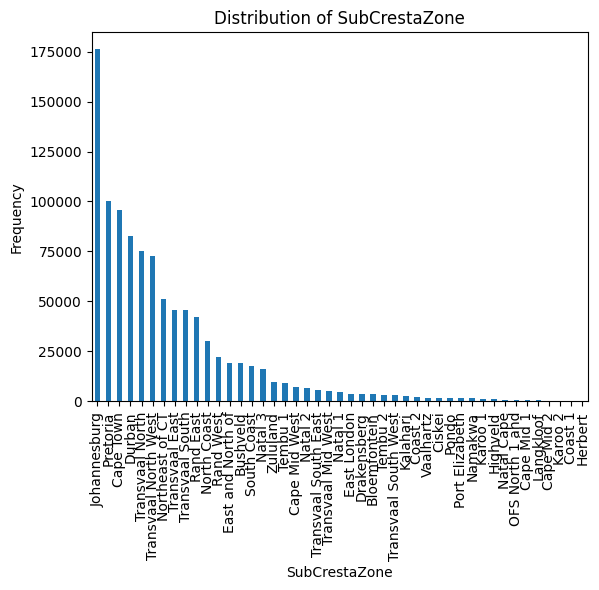

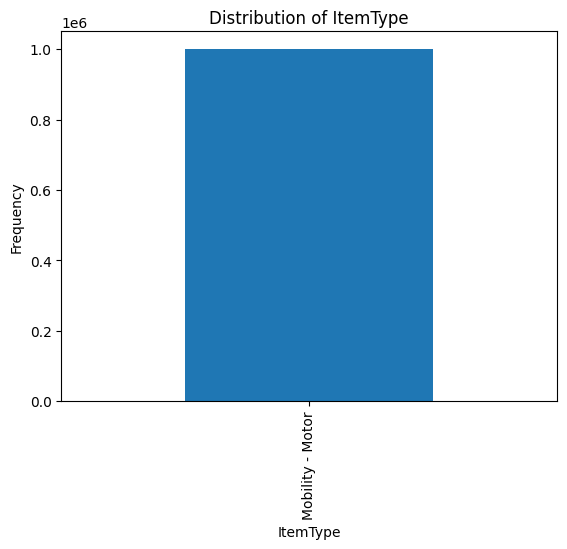

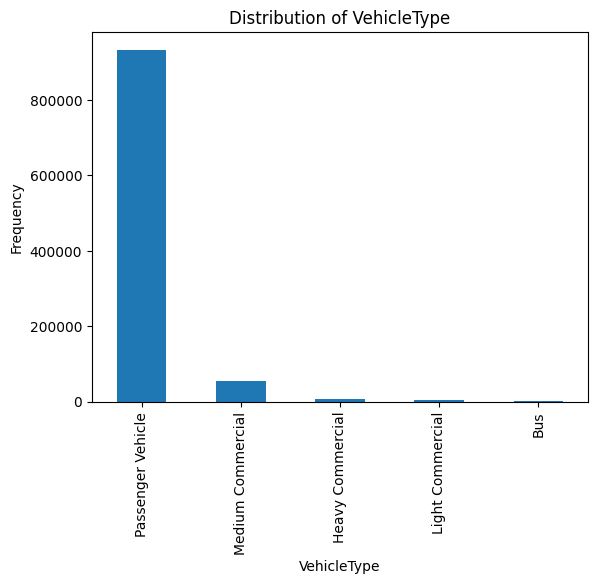

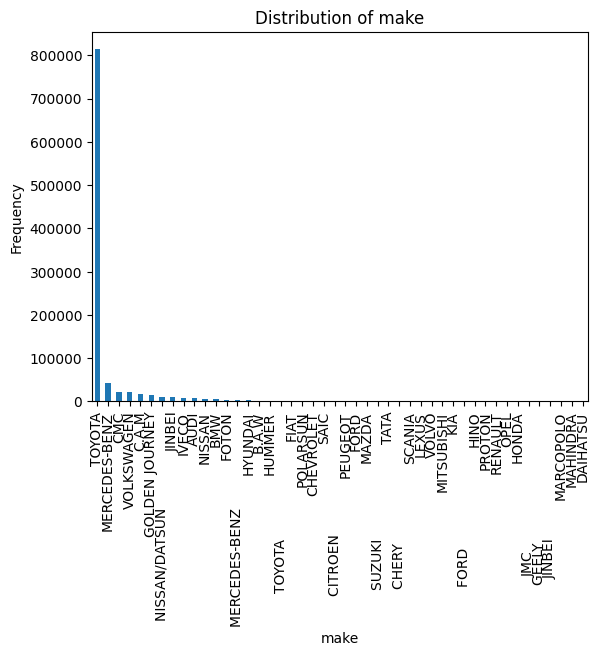

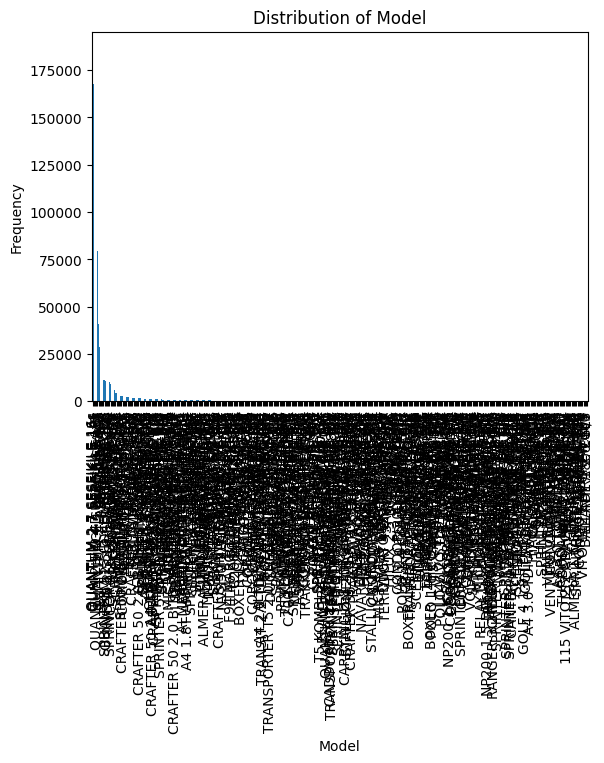

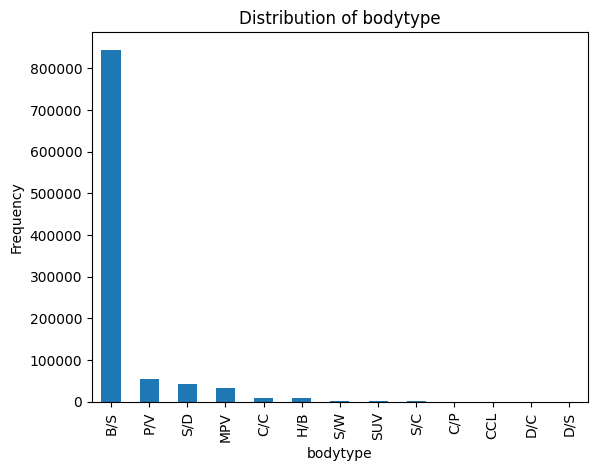

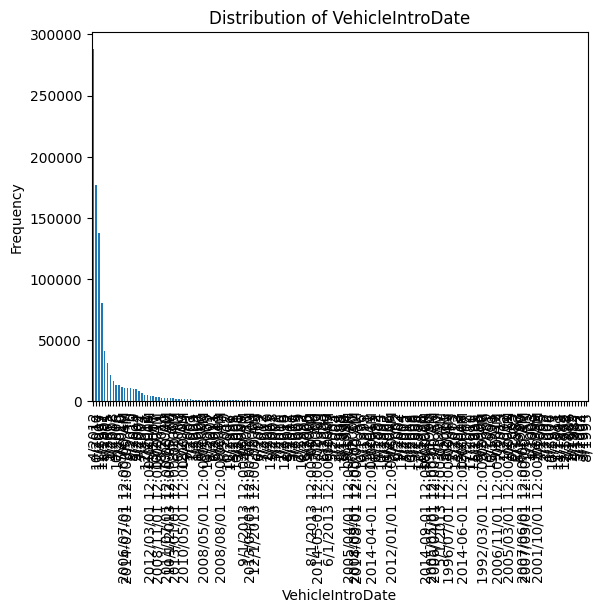

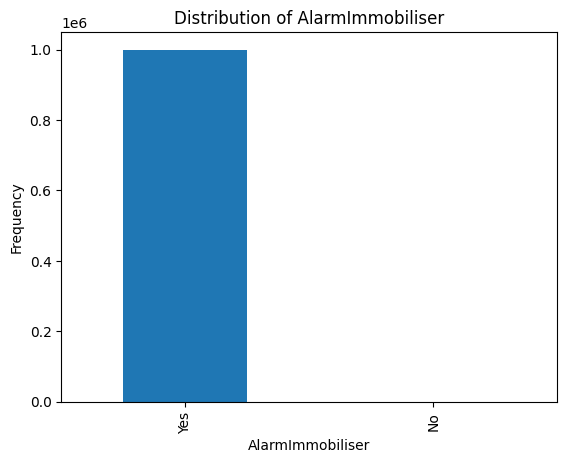

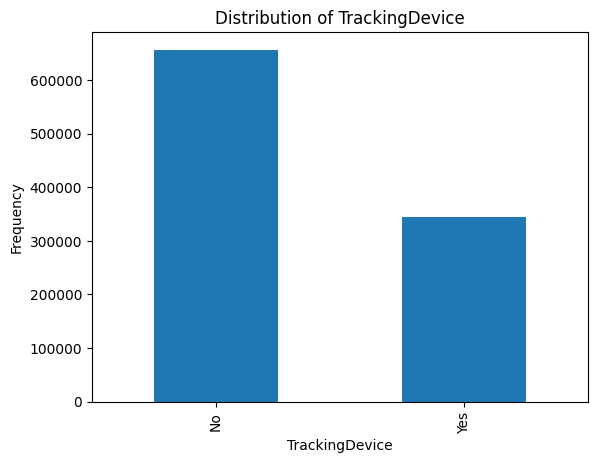

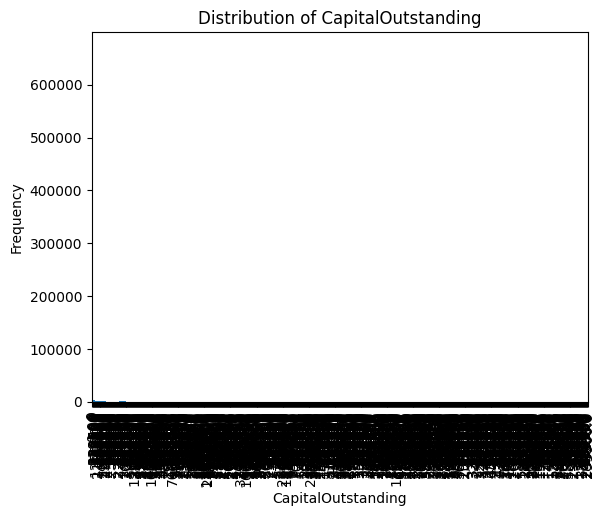

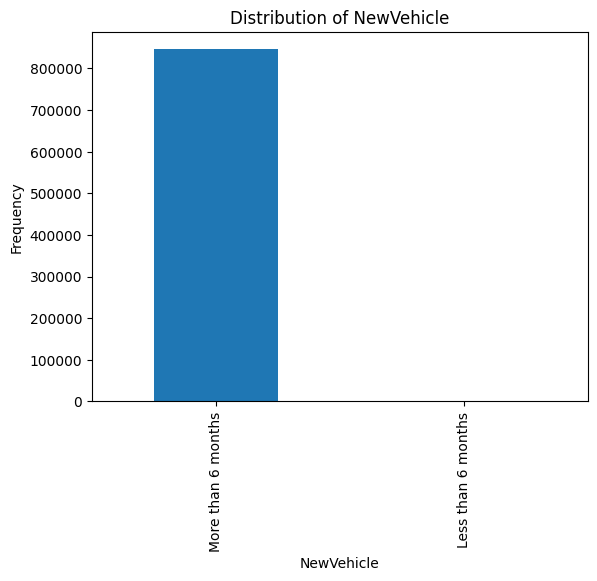

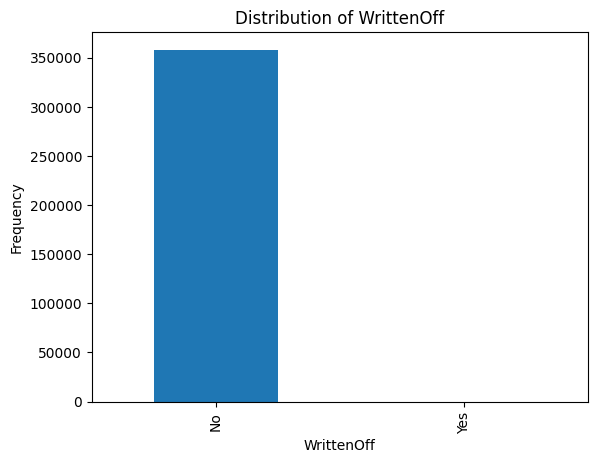

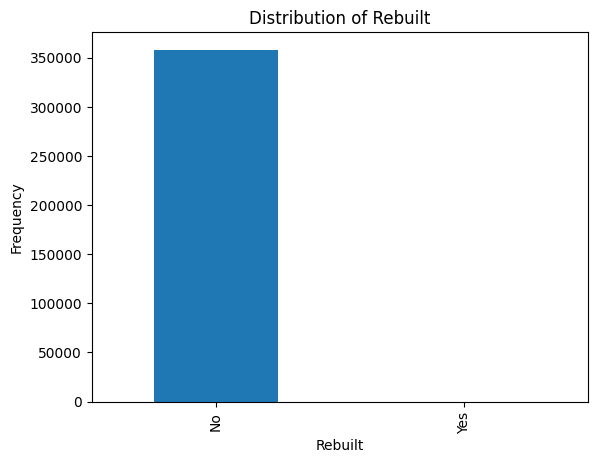

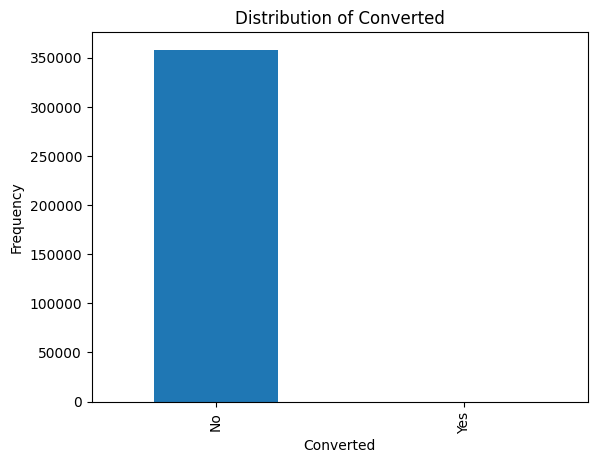

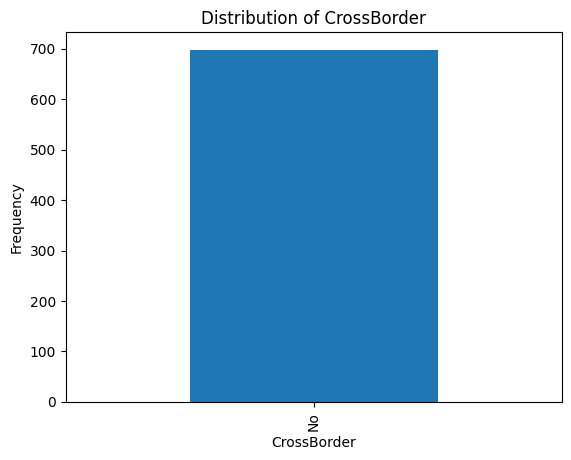

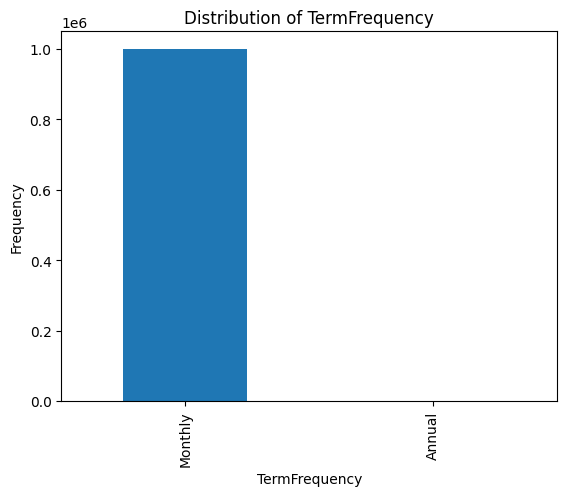

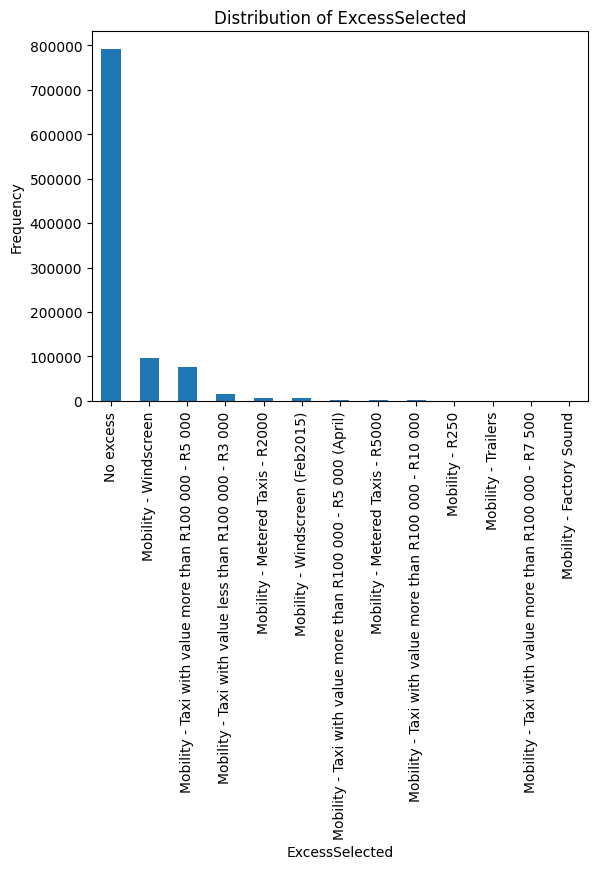

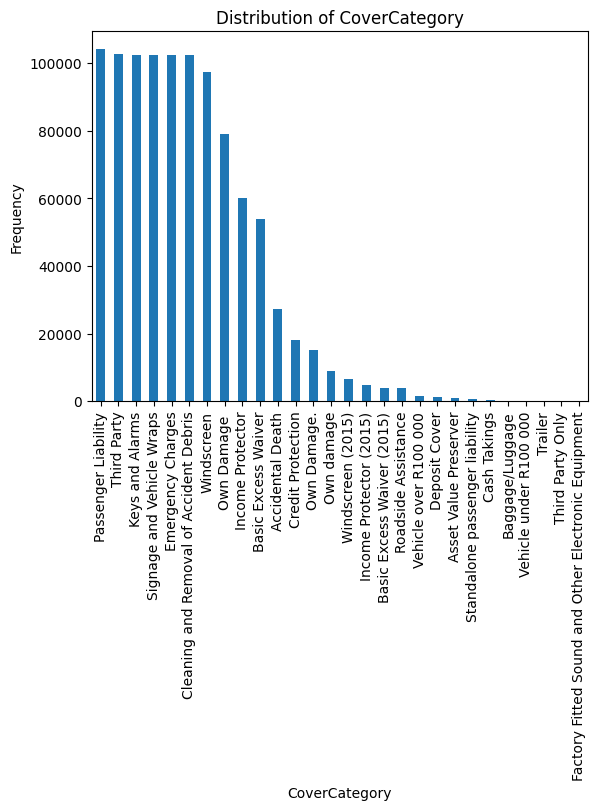

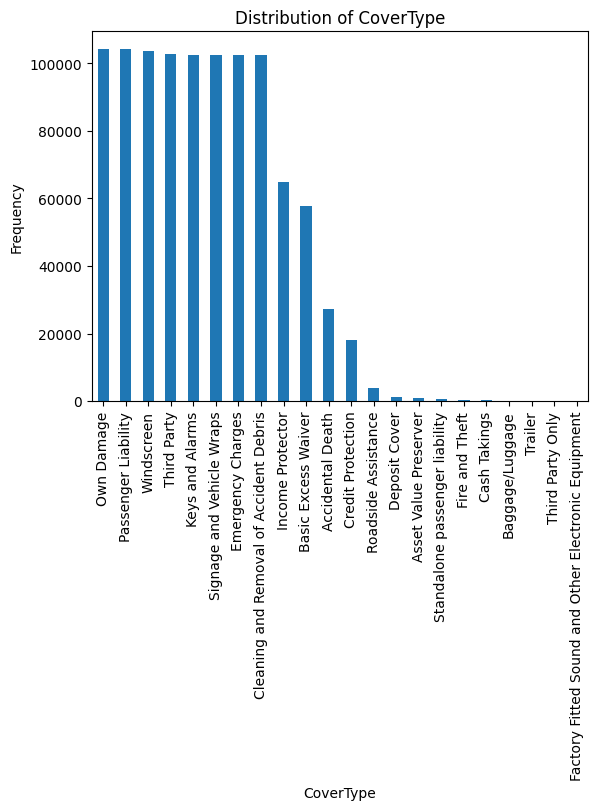

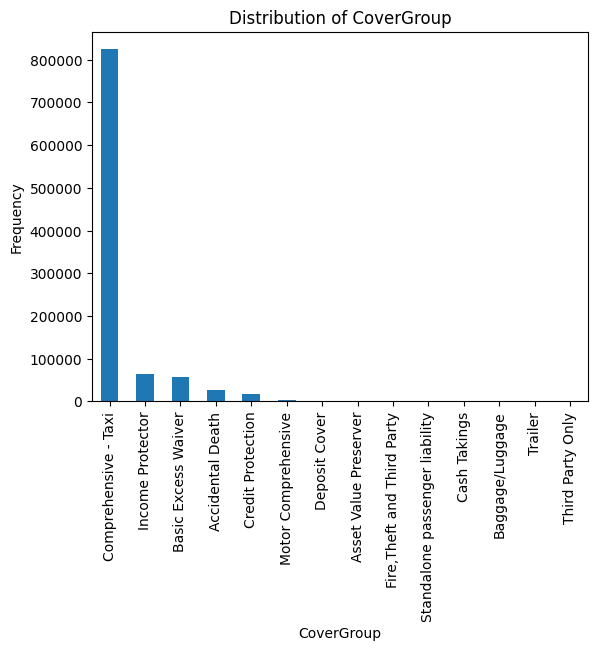

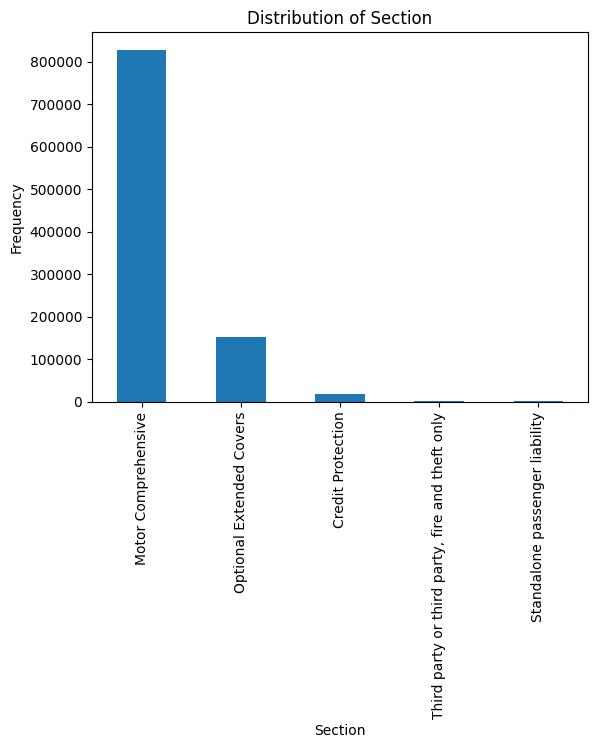

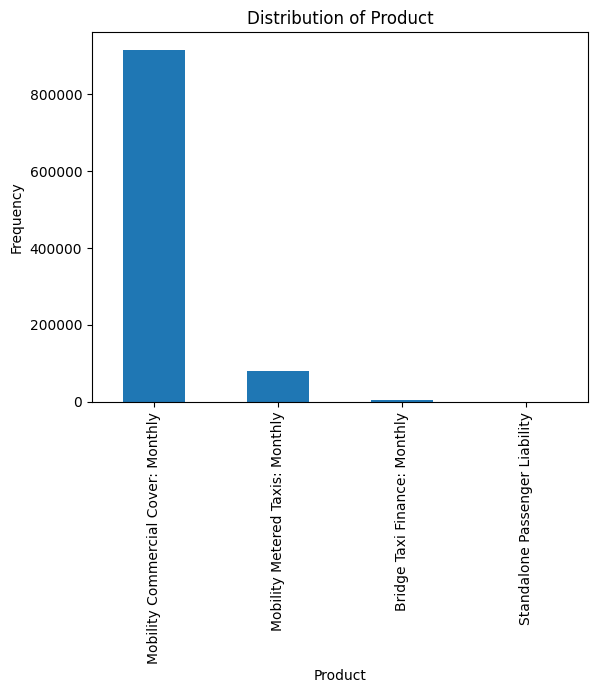

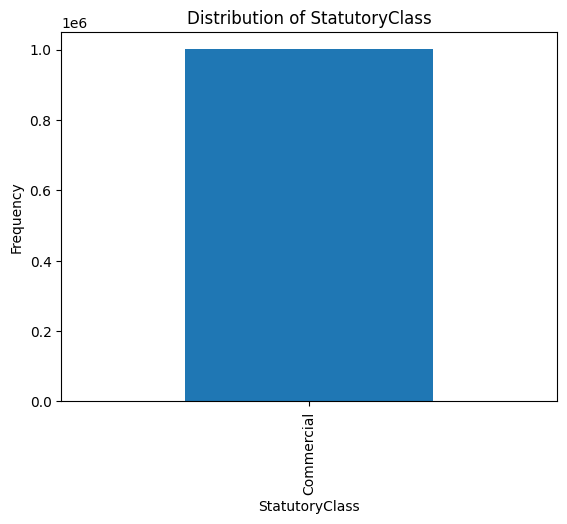

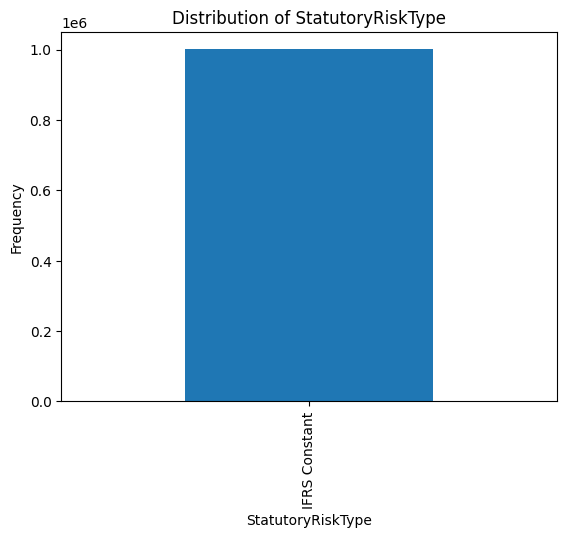

In [24]:
def plot_distributions(filename):
    df = pd.read_csv(filename)
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):  # Check for non-numeric columns
            # Plot bar chart for categorical columns (including booleans)
            plt.figure()
            df[column].value_counts().plot(kind='bar')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

# Example usage
filename = 'MachineLearningRating_v3.csv'  # Replace with your CSV file name

plot_distributions(filename)

C:\Users\khan\AppData\Local\Temp\ipykernel_4944\1440386073.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MachineLearningRating_v3.csv')
C:\Users\khan\AppData\Local\Temp\ipykernel_4944\1440386073.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalPremium'].fillna(0, inplace=True)  # Replace missing values in 'TotalPremium' with 0
C:\Users\khan\AppData\Local\Temp\ipykernel_4944\1440386073.py:5: FutureWarning: A value is trying to be set

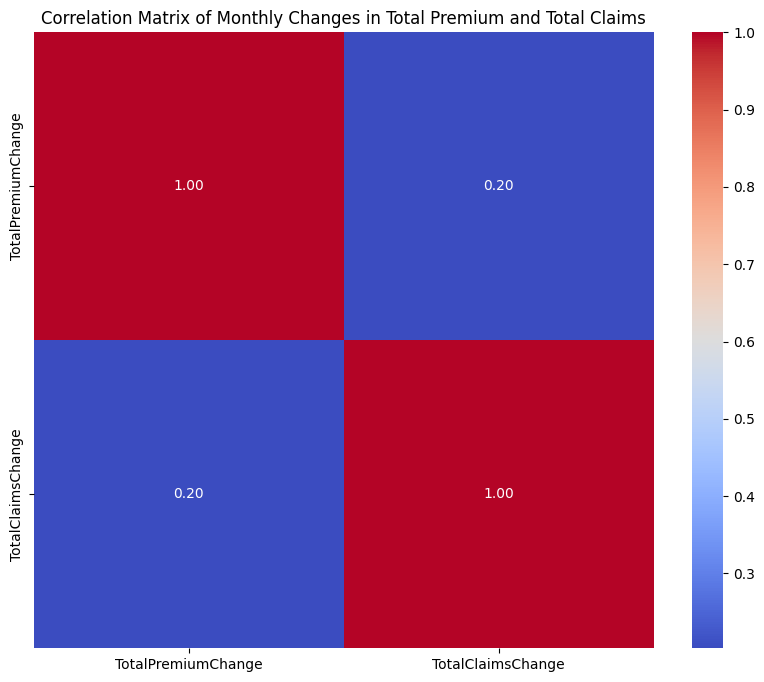

KeyboardInterrupt: 

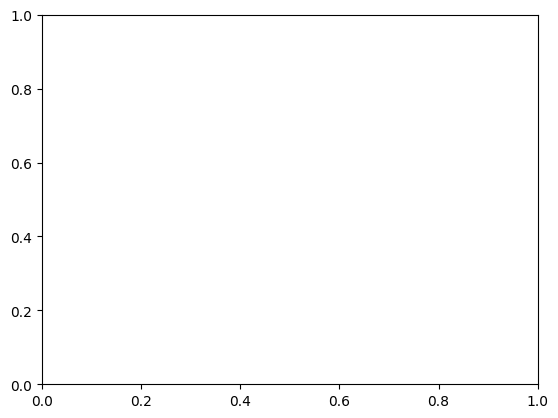

In [34]:
df = pd.read_csv('MachineLearningRating_v3.csv')

# Handle missing values (if needed)
df['TotalPremium'].fillna(0, inplace=True)  # Replace missing values in 'TotalPremium' with 0
df['TotalClaims'].fillna(0, inplace=True)  # Replace missing values in 'TotalClaims' with 0

# Convert to numeric (if needed)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'])
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'])

# Calculate monthly changes
df['TotalPremiumChange'] = df['TotalPremium'].pct_change()
df['TotalClaimsChange'] = df['TotalClaims'].pct_change()

# Analyze changes across the entire dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df[['TotalPremiumChange', 'TotalClaimsChange']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Monthly Changes in Total Premium and Total Claims')
plt.show()

# Create bar plots for each metric across the entire dataset
for metric in ['TotalPremiumChange', 'TotalClaimsChange']:
    plt.figure()
    df[metric].plot(kind='bar')
    plt.title(f'Average Monthly Change in {metric}')
    plt.xlabel('Month')
    plt.ylabel(f'Average {metric} Change')
    plt.show()

# Analyze CoverType distribution across the entire dataset
plt.figure()
df['CoverType'].value_counts().plot(kind='bar')
plt.title('Distribution of CoverType')
plt.xlabel('CoverType')
plt.ylabel('Frequency')
plt.show()